# Table of content

In [1]:
# We use 'Numpy'for mathematical operations on large, multi-dimensional arrays and matrices
# 'Pandas' is used for data manipulation and analysis
import numpy as np
import pandas as pd 



#  To build and analyze various statistical models we use 'Statsmodels'
import statsmodels
import statsmodels.api as sm
from statsmodels.compat import lzip
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
from statsmodels.tools.eval_measures import rmse
from statsmodels.stats.outliers_influence import variance_inflation_factor

# 'Scikit-learn' (sklearn) emphasizes various regression, classification and clustering algorithms
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn import preprocessing

# To perform scientific computations
from scipy.stats import shapiro
from scipy import stats

# 'Matplotlib' is a data visualization library for 2D and 3D plots
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
data = pd.read_csv(r'C:\Users\DELL\Desktop\PG\ML\Capston project\Stock price prediction\Nifty50.csv')
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2007-09-17,4518.450195,4549.049805,4482.850098,4494.649902,4494.649902,0.0
1,2007-09-18,4494.100098,4551.799805,4481.549805,4546.200195,4546.200195,0.0
2,2007-09-19,4550.250000,4739.000000,4550.250000,4732.350098,4732.350098,0.0
3,2007-09-20,4734.850098,4760.850098,4721.149902,4747.549805,4747.549805,0.0
4,2007-09-21,4752.950195,4855.700195,4733.700195,4837.549805,4837.549805,0.0


In [3]:
data.shape

(3691, 7)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3691 entries, 0 to 3690
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       3691 non-null   object 
 1   Open       3661 non-null   float64
 2   High       3661 non-null   float64
 3   Low        3661 non-null   float64
 4   Close      3661 non-null   float64
 5   Adj Close  3661 non-null   float64
 6   Volume     3661 non-null   float64
dtypes: float64(6), object(1)
memory usage: 202.0+ KB


In [5]:
data.isnull().sum()

Date          0
Open         30
High         30
Low          30
Close        30
Adj Close    30
Volume       30
dtype: int64

In [6]:
data = data.dropna(axis=0)

In [7]:
data.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [8]:
data.shape

(3661, 7)

In [9]:
data['Date'] = pd.to_datetime(data['Date'])

In [10]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,3661.000000,3661.000000,3661.000000,3661.000000,3661.000000,3.661000e+03
mean,8446.724748,8496.785237,8382.336351,8440.838419,8440.838419,1.928674e+05
std,3748.837333,3757.837736,3730.412482,3745.233377,3745.233377,2.184779e+05
min,2553.600098,2585.300049,2252.750000,2524.199951,2524.199951,0.000000e+00
25%,5413.700195,5453.450195,5369.049805,5413.850098,5413.850098,0.000000e+00
50%,7888.750000,7925.399902,7832.000000,7879.399902,7879.399902,1.562000e+05
75%,10750.849609,10789.450195,10689.799805,10741.099609,10741.099609,2.682000e+05
max,18602.349609,18604.449219,18445.300781,18477.050781,18477.050781,1.811000e+06


Text(0, 0.5, 'Close value')

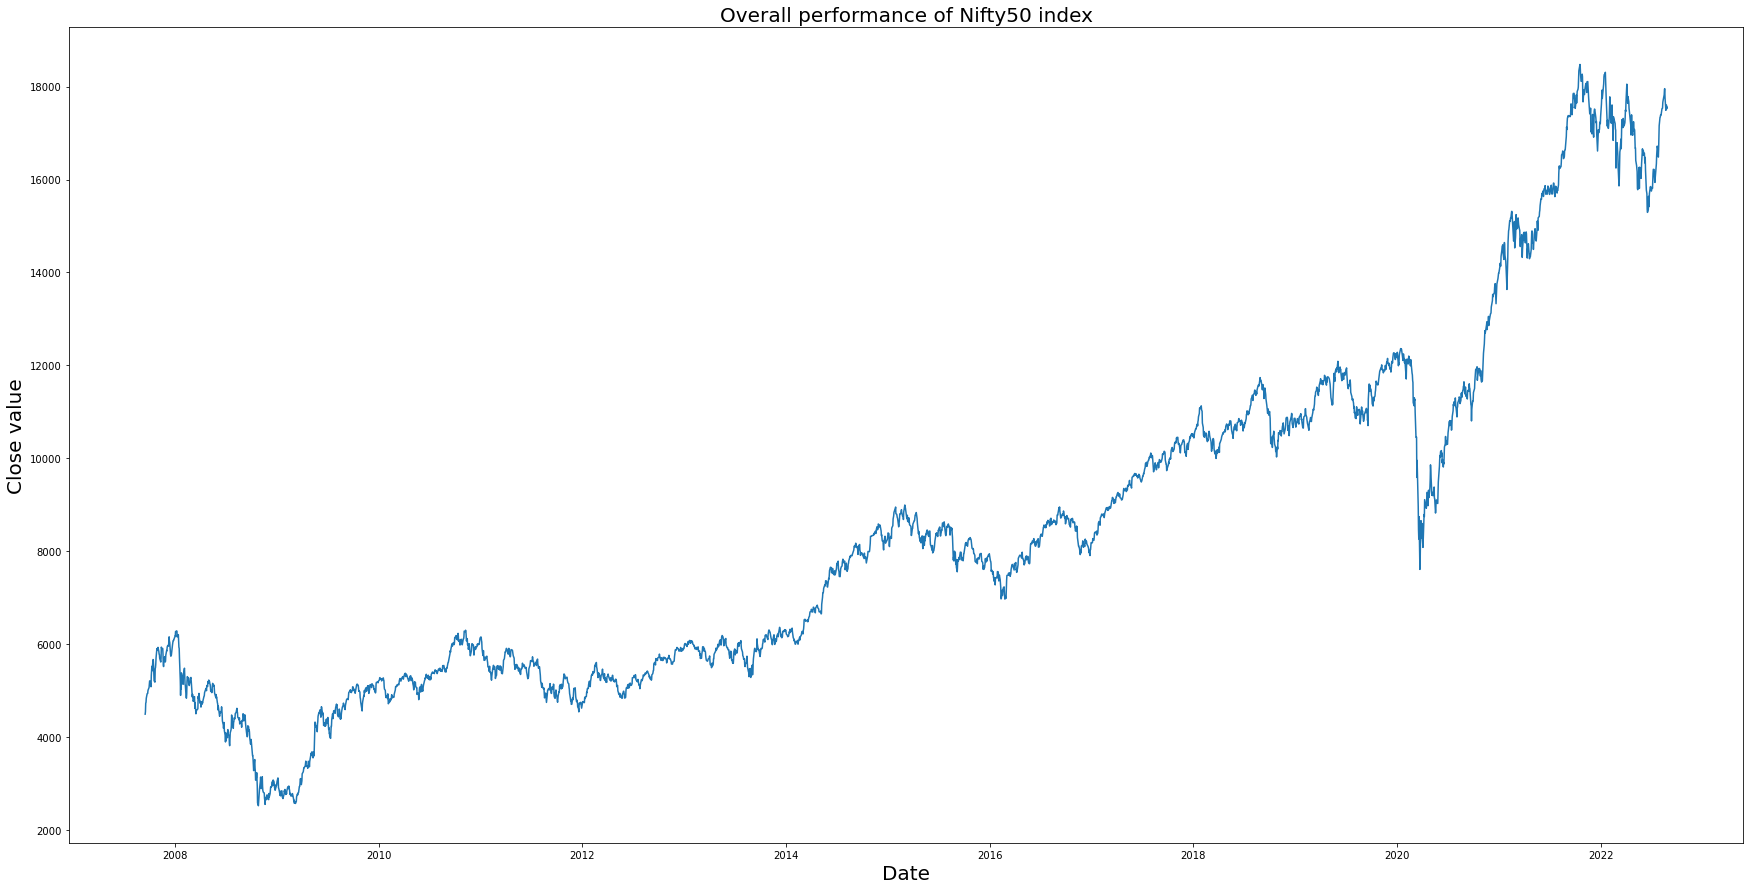

In [11]:
plt.figure(figsize=(30,15))

plt.plot(data['Date'], data['Close'])

plt.title('Overall performance of Nifty50 index', fontsize=20)

plt.xlabel('Date', fontsize=20)
plt.ylabel('Close value', fontsize=20)

In [12]:
data.set_index('Date', inplace=True)
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2007-09-17,4518.450195,4549.049805,4482.850098,4494.649902,4494.649902,0.0
2007-09-18,4494.100098,4551.799805,4481.549805,4546.200195,4546.200195,0.0
2007-09-19,4550.250000,4739.000000,4550.250000,4732.350098,4732.350098,0.0
2007-09-20,4734.850098,4760.850098,4721.149902,4747.549805,4747.549805,0.0
2007-09-21,4752.950195,4855.700195,4733.700195,4837.549805,4837.549805,0.0


### Nifty50 Daily Returns

In [13]:
data['Daily_returns'] = data['Close'].pct_change()

In [14]:
data.head()

,Open,High,Low,Close,Adj Close,Volume,Daily_returns
Date,,,,,,,
2007-09-17,4518.450195,4549.049805,4482.850098,4494.649902,4494.649902,0.0,NaN
2007-09-18,4494.100098,4551.799805,4481.549805,4546.200195,4546.200195,0.0,0.011469
2007-09-19,4550.250000,4739.000000,4550.250000,4732.350098,4732.350098,0.0,0.040946
2007-09-20,4734.850098,4760.850098,4721.149902,4747.549805,4747.549805,0.0,0.003212
2007-09-21,4752.950195,4855.700195,4733.700195,4837.549805,4837.549805,0.0,0.018957


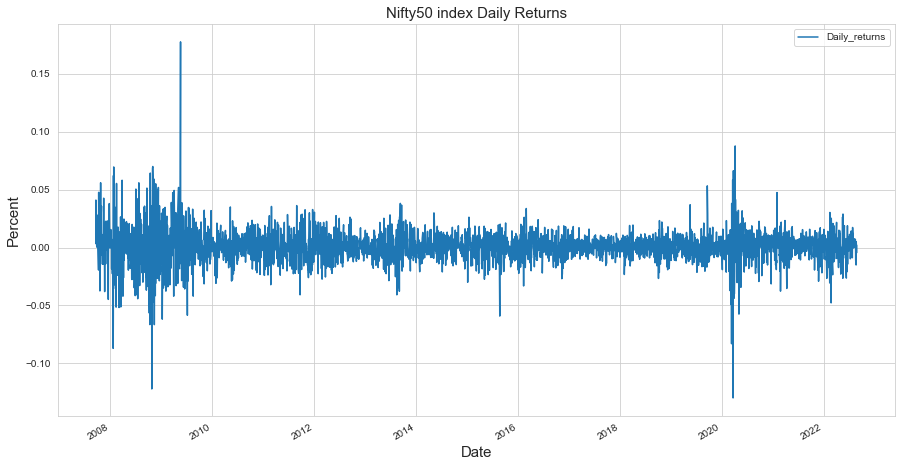

In [15]:
sns.set_style('whitegrid')
plt.figure(figsize=(15,8))
data['Daily_returns'].plot()
plt.xlabel("Date", fontsize=15)
plt.ylabel("Percent", fontsize=15)
plt.title("Nifty50 index Daily Returns",fontsize= 15 )
plt.legend()

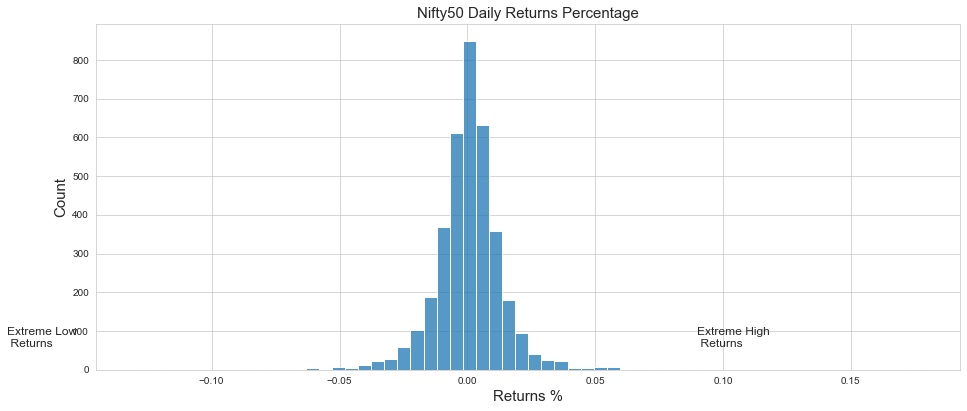

In [16]:
sns.set_style('whitegrid')
fig = plt.figure(figsize=(15,6))
ax1 = fig.add_axes([0.1,0.1,0.8,0.8])
sns.histplot(data= data['Daily_returns'], bins=60)
ax1.set_xlabel("Returns %", fontsize=15)
ax1.set_ylabel("Count", fontsize =15)
ax1.set_title("Nifty50 Daily Returns Percentage",fontsize= 15 )
ax1.text(-0.18,60,"Extreme Low\n Returns",fontsize= 12)
ax1.text(0.09,60,"Extreme High\n Returns", fontsize= 12)
plt.show()

## Nifty50 Cumulative Returns

In [17]:
data['Cum_returns']= (data['Daily_returns']+1).cumprod()
data.head()

,Open,High,Low,Close,Adj Close,Volume,Daily_returns,Cum_returns
Date,,,,,,,,
2007-09-17,4518.450195,4549.049805,4482.850098,4494.649902,4494.649902,0.0,NaN,NaN
2007-09-18,4494.100098,4551.799805,4481.549805,4546.200195,4546.200195,0.0,0.011469,1.011469
2007-09-19,4550.250000,4739.000000,4550.250000,4732.350098,4732.350098,0.0,0.040946,1.052885
2007-09-20,4734.850098,4760.850098,4721.149902,4747.549805,4747.549805,0.0,0.003212,1.056267
2007-09-21,4752.950195,4855.700195,4733.700195,4837.549805,4837.549805,0.0,0.018957,1.076291


In [18]:
data['Cum_returns'].mean()

1.8782144987435203

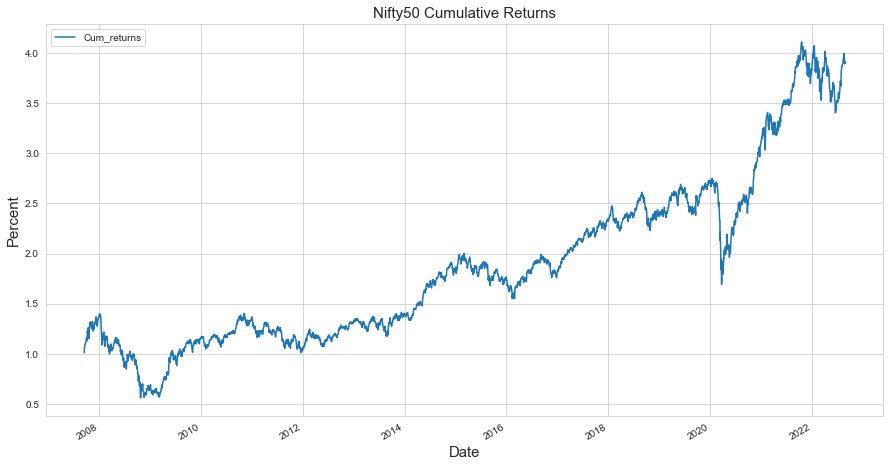

In [19]:
sns.set_style('whitegrid')
plt.figure(figsize=(15,8))
data['Cum_returns'].plot()
plt.xlabel("Date", fontsize=15)
plt.ylabel("Percent", fontsize=15)
plt.title("Nifty50 Cumulative Returns",fontsize= 15 )
plt.legend()

In [41]:
X = data[['Open', 'High', 'Low']]
y = data[['Close']]

In [42]:
from sklearn.preprocessing import StandardScaler


# Standarize features
sc = StandardScaler()
X = sc.fit_transform(X)

In [43]:
# split the dataset into train & test
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(X,y, test_size = 0.30, random_state=5)
print("X_train ",X_train.shape)
print("X_test ",X_test.shape)
print("y_train ",y_train.shape)
print("y_test ",y_test.shape)

X_train  (2562, 3)
X_test  (1099, 3)
y_train  (2562, 1)
y_test  (1099, 1)


In [44]:
model = LinearRegression()

In [45]:
model.fit(X_train, y_train)

LinearRegression()

In [46]:
y_pred = model.predict(X_test)

In [47]:
model.score(X_train, y_train)

0.9999206559002759

In [48]:
from sklearn import metrics
MAE = metrics.mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error (MAE):',MAE)

MSE = metrics.mean_squared_error(y_test, y_pred)
print('Mean Squared Error (MSE):', MSE)

RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error (RMSE):', RMSE)




Mean Absolute Error (MAE): 23.985385201048928
Mean Squared Error (MSE): 1608.2941672388872
Root Mean Squared Error (RMSE): 40.10354307587906


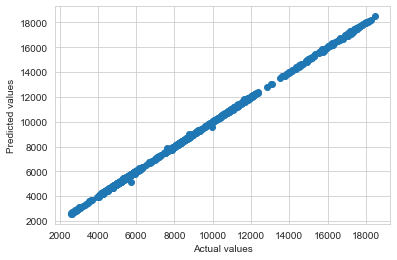

In [49]:
# Checking scatter of data between Y_test and predicted values
plt.scatter(y_test,y_pred)
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.show()

In [53]:
data.iloc[100]

Open             5132.100098
High             5173.850098
Low              5034.250000
Close            5120.350098
Adj Close        5120.350098
Volume              0.000000
Daily_returns      -0.002513
Cum_returns         1.139210
Name: 2008-02-08 00:00:00, dtype: float64

In [54]:
ab = np.array([5132.100,5173.85,5034.25], ndmin=2)
ab = sc.transform(ab)

In [55]:
model.predict(ab)

array([[5091.88666115]])

In [32]:
import pickle

pickle.dump(model, open('Nifty50_model.pkl','wb'))


#  Time series Forecasting

In [70]:
import warnings
import itertools
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
import seaborn as sns

warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
matplotlib.rcParams['axes.labelsize']=14
matplotlib.rcParams['xtick.labelsize']=12
matplotlib.rcParams['ytick.labelsize']=12
matplotlib.rcParams['text.color']='k'

In [71]:
df = pd.read_csv(r'C:\Users\DELL\Desktop\PG\ML\Capston project\Stock price prediction\Nifty50.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2007-09-17,4518.450195,4549.049805,4482.850098,4494.649902,4494.649902,0.0
1,2007-09-18,4494.100098,4551.799805,4481.549805,4546.200195,4546.200195,0.0
2,2007-09-19,4550.250000,4739.000000,4550.250000,4732.350098,4732.350098,0.0
3,2007-09-20,4734.850098,4760.850098,4721.149902,4747.549805,4747.549805,0.0
4,2007-09-21,4752.950195,4855.700195,4733.700195,4837.549805,4837.549805,0.0


In [72]:
df['Date'].min(), df['Date'].max()

('2007-09-17', '2022-08-26')

In [73]:
df = df.dropna(axis=0)

In [74]:
df.shape

(3661, 7)

In [75]:
df.drop(['Open', 'High', 'Low','Adj Close', 'Volume'], axis=1, inplace=True)
df = df.sort_values('Date')


In [76]:
df.isnull().sum()

Date     0
Close    0
dtype: int64

In [77]:
df = df.groupby('Date')['Close'].sum().reset_index()

In [78]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df.index

DatetimeIndex(['2007-09-17', '2007-09-18', '2007-09-19', '2007-09-20',
               '2007-09-21', '2007-09-24', '2007-09-25', '2007-09-26',
               '2007-09-27', '2007-09-28',
               ...
               '2022-08-12', '2022-08-16', '2022-08-17', '2022-08-18',
               '2022-08-19', '2022-08-22', '2022-08-23', '2022-08-24',
               '2022-08-25', '2022-08-26'],
              dtype='datetime64[ns]', name='Date', length=3661, freq=None)

In [79]:
df.head()

,Close
Date,
2007-09-17,4494.649902
2007-09-18,4546.200195
2007-09-19,4732.350098
2007-09-20,4747.549805
2007-09-21,4837.549805


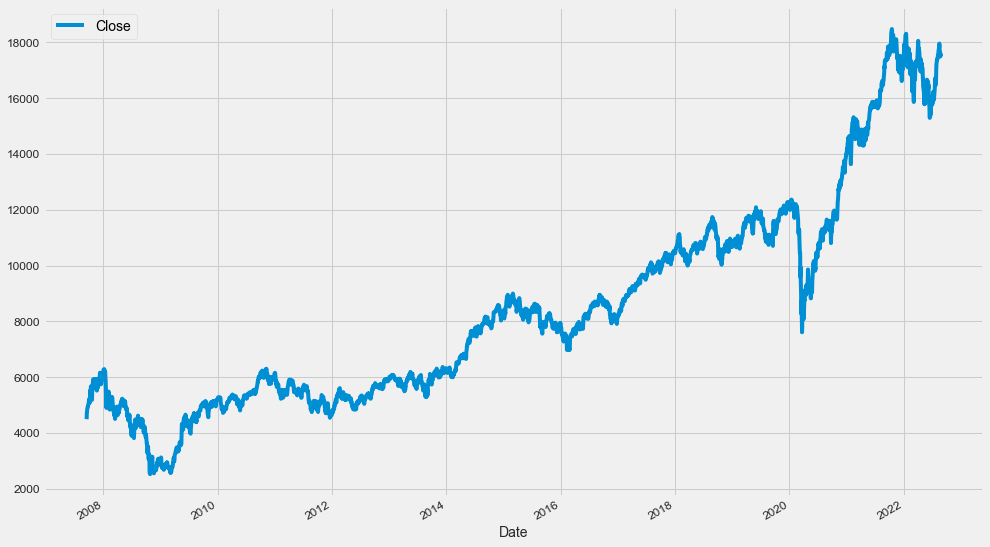

In [80]:
df.plot(figsize=(15, 10))
plt.show()

In [81]:
y = df['Close'].resample('MS').mean()

In [82]:
y.head()

Date
2007-09-01    4819.175000
2007-10-01    5456.618164
2007-11-01    5752.638091
2007-12-01    5963.573705
2008-01-01    5756.354344
Freq: MS, Name: Close, dtype: float64

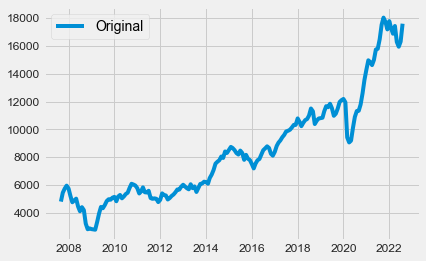

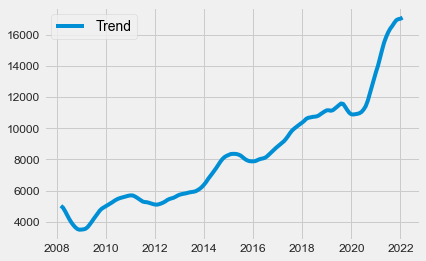

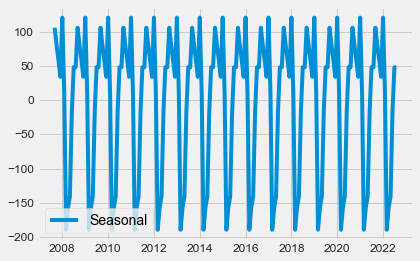

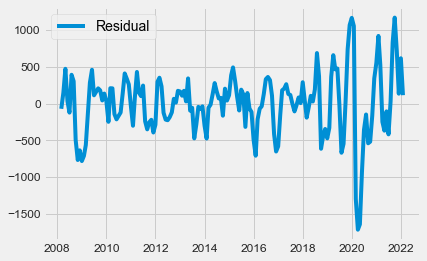

In [83]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(y)

plt.plot(y, label = 'Original')
plt.legend(loc = 'best')

trend = decomposition.trend
plt.show()
plt.plot(trend, label = 'Trend')
plt.legend(loc = 'best')

seasonal = decomposition.seasonal
plt.show()
plt.plot(seasonal, label = 'Seasonal')
plt.legend(loc = 'best')

residual = decomposition.resid
plt.show()
plt.plot(residual, label = 'Residual')
plt.legend(loc='best')

In [84]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(y)

print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))


ADF Statistic: 0.623473
p-value: 0.988180
Critical Values:
	1%: -3.468
	5%: -2.878
	10%: -2.576


In [85]:
def adf_test(timeseries):
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used',
                                             'Number of Observations Used'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

In [86]:
adf_test(y)

Results of Dickey-Fuller Test:
Test Statistic                   0.623473
p-value                          0.988180
#Lags Used                       1.000000
Number of Observations Used    178.000000
Critical Value (1%)             -3.467632
Critical Value (5%)             -2.877918
Critical Value (10%)            -2.575501
dtype: float64


### The test statistic > critical value, Hence we accept the null hypothesis which implies that the series is not stationary

# 4.3.2 KPSS (Kwiatkowski-Phillips-Schmidt-Shin) Test
Null Hypothesis: The process is trend stationary.

Alternate Hypothesis: The series has a unit root (series is not stationary).

In [87]:
from statsmodels.tsa.stattools import kpss
#define KPSS
def kpss_test(timeseries):
    print ('Results of KPSS Test:')
    kpsstest = kpss(timeseries, regression='c',nlags = 'legacy')
#regression: str{“c”, “ct”}
#The null hypothesis for the KPSS test.
#“c” : The data is stationary around a constant (default).
#“ct” : The data is stationary around a trend.
#nlags: {str, int}, optional
#Indicates the number of lags to be used
#If set to “legacy”, uses int(12 * (n / 100)**(1 / 4))
# A lag is a fixed amount of passing time
    kpss_output = pd.Series(kpsstest[0:3], index=['Test Statistic','p-value','Lags Used'])
    for key,value in kpsstest[3].items():
        kpss_output['Critical Value (%s)'%key] = value
    print (kpss_output)

In [88]:
kpss_test(y)

Results of KPSS Test:
Test Statistic            1.177409
p-value                   0.010000
Lags Used                14.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


<AxesSubplot:xlabel='Date'>

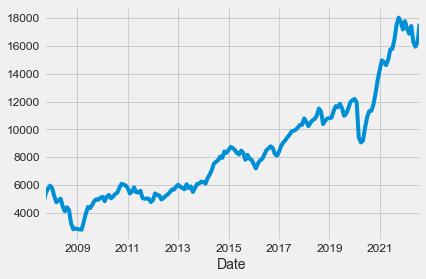

In [89]:
y.dropna(inplace=True)
y.plot()

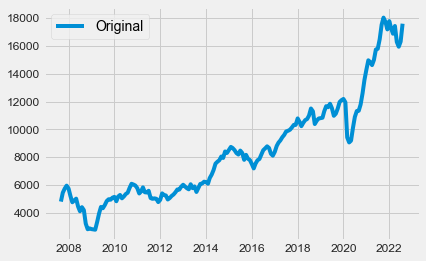

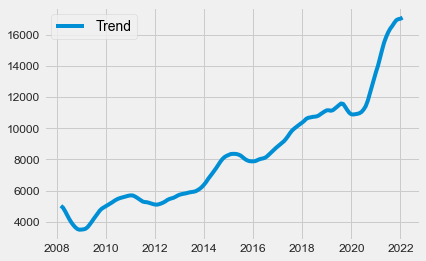

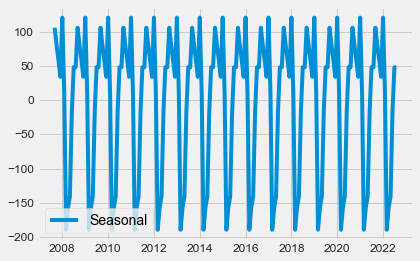

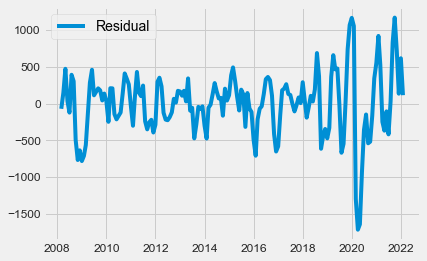

In [90]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(y)

plt.plot(y, label = 'Original')
plt.legend(loc = 'best')

trend = decomposition.trend
plt.show()
plt.plot(trend, label = 'Trend')
plt.legend(loc = 'best')

seasonal = decomposition.seasonal
plt.show()
plt.plot(seasonal, label = 'Seasonal')
plt.legend(loc = 'best')

residual = decomposition.resid
plt.show()
plt.plot(residual, label = 'Residual')
plt.legend(loc='best')

In [91]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [92]:
from pylab import rcParams

order_list = []
param_seasonal_list = []
aic_list = []
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y, order=param,
seasonal_order=param_seasonal,
enforce_stationarity=False, 
enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
            order_list.append(param)
            param_seasonal_list.append(param_seasonal)
            aic_list.append(results.aic)
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:3778.468767428618
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:3441.4182350587216
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:2991.851302660062
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:2778.080951032924
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:2961.439913348613
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:2869.4627255729047
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:2795.073500423518
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:2779.35849361448
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:3630.754602760296
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:3127.8009914896484
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:2781.70388515548
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:2581.496633931293
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:2781.7556214574042
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:2660.44012446517
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:2614.8931886677874
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:2583.2204705241825
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:2650.0044965931693
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:2472.152293975724
ARIMA(

In [93]:
min_val = aic_list.index(min(aic_list))
order = order_list[min_val]
seasonal_order = param_seasonal_list[min_val]

In [94]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=order,
                                seasonal_order=seasonal_order,
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary())

                                     SARIMAX Results                                      
Dep. Variable:                              Close   No. Observations:                  180
Model:             SARIMAX(0, 1, 1)x(1, 1, 1, 12)   Log Likelihood               -1140.533
Date:                            Mon, 12 Sep 2022   AIC                           2289.065
Time:                                    12:05:23   BIC                           2301.187
Sample:                                09-01-2007   HQIC                          2293.989
                                     - 08-01-2022                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.3220      0.088      3.669      0.000       0.150       0.494
ar.S.L12      -0.1869      0.142   

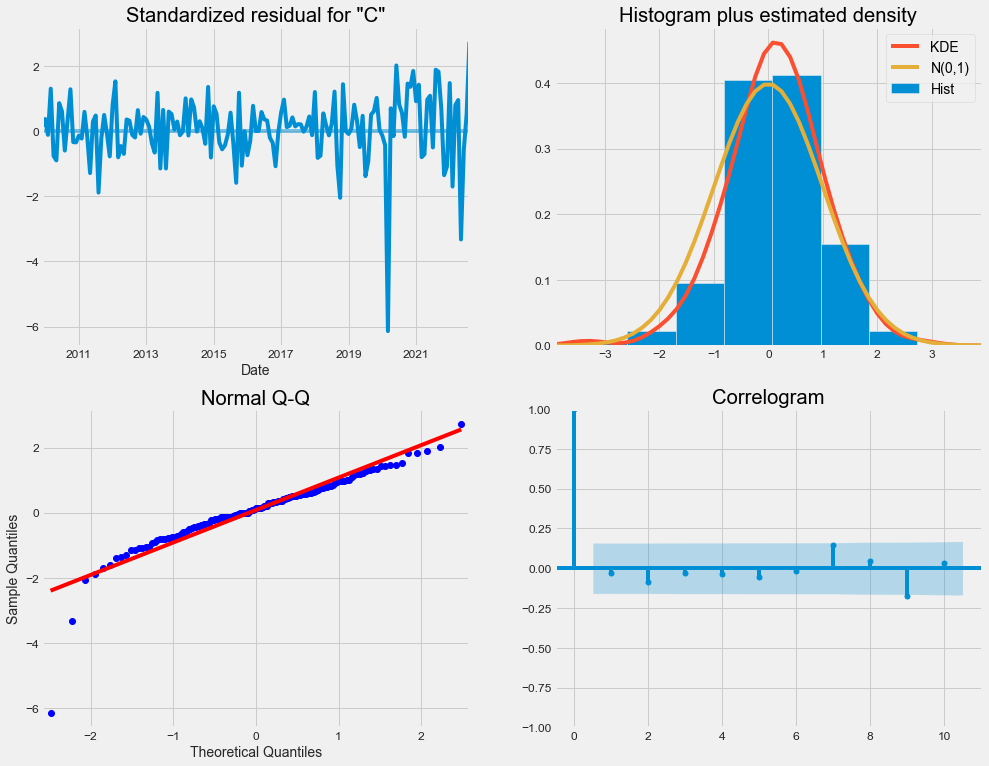

In [95]:
results.plot_diagnostics(figsize=(15, 12))
plt.show()

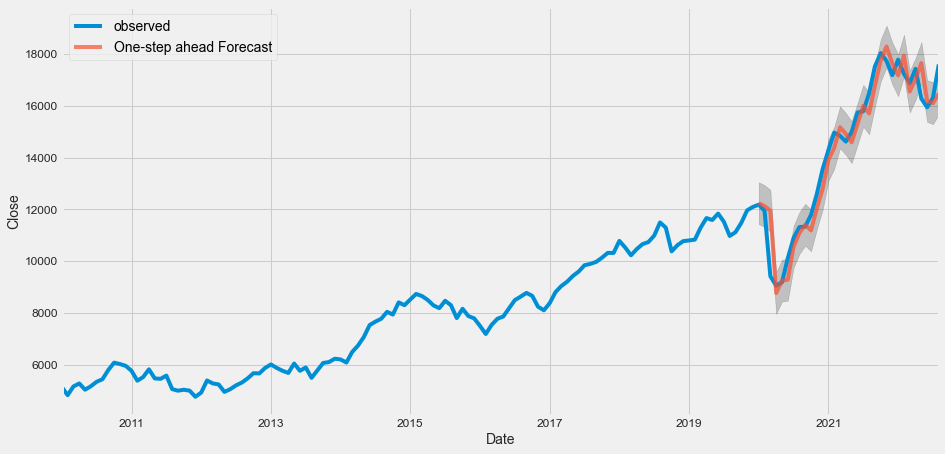

In [96]:
#set forecasts to start at 2017–01–01 to the end of the data to forecast

pred = results.get_prediction(start=pd.to_datetime('2020-01-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = y['2010':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Close')
plt.legend()
plt.show()

In [97]:
y_forecasted = pred.predicted_mean
y_truth = y['2007-09-17':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Mean Squared Error of our forecasts is 492170.4
The Root Mean Squared Error of our forecasts is 701.55


             lower Close   upper Close
2022-09-01  17220.941012  18832.426437
2022-10-01  16793.040360  19464.176791
2022-11-01  16684.843062  20101.380632
2022-12-01  16598.853968  20625.076361
2023-01-01  16602.741407  21157.761524
2023-02-01  16437.282752  21465.796320
2023-03-01  15827.274500  21288.381483
2023-04-01  15655.450772  21517.313107
2023-05-01  15558.044414  21794.964415
2023-06-01  15770.155426  22360.823868
2023-07-01  15808.616978  22734.990899
2023-08-01  15906.133219  23152.674544
2023-09-01  16018.585766  23592.019373
2023-10-01  16037.209661  23930.365764
2023-11-01  16042.358170  24242.741236
2023-12-01  15970.473028  24466.979364
2024-01-01  16156.995287  24939.646532
2024-02-01  15974.616248  25034.379173
2024-03-01  15452.526232  24781.172765
2024-04-01  15448.728972  25038.723121
2024-05-01  15180.203971  25024.609988
2024-06-01  15309.358477  25401.765054
2024-07-01  15424.462334  25758.920041
2024-08-01  15755.772329  26326.738381


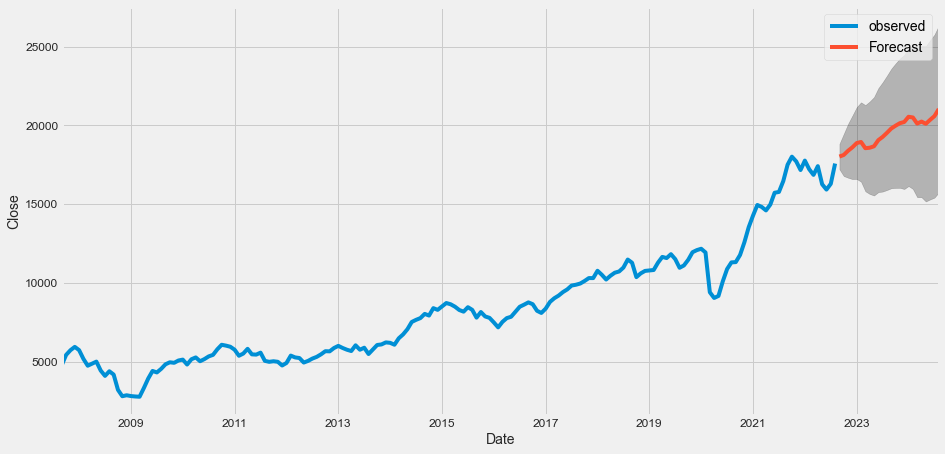

In [98]:
pred_uc = results.get_forecast(steps=24)
pred_ci = pred_uc.conf_int()
ax = y.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Close')
print(pred_ci)
plt.legend()
plt.show()

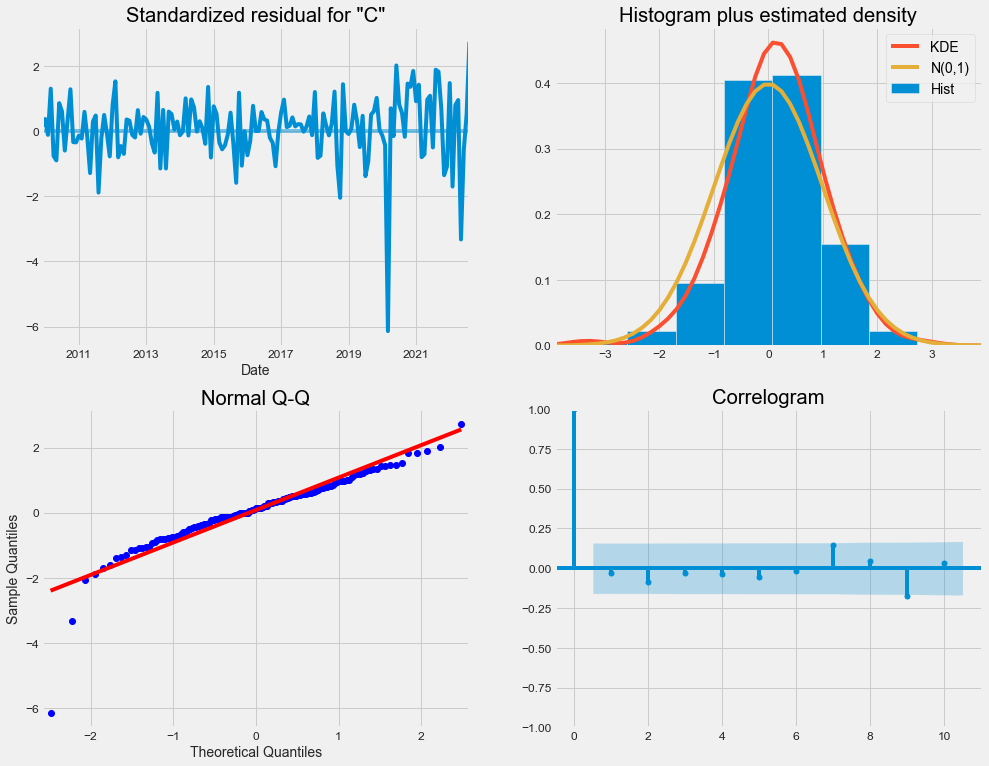

In [99]:
results.plot_diagnostics(figsize=(15,12))
plt.show()